# Timing Functions

This notebook has the results of timing various CSR functions.  It uses the data produced by the benchmark suite and saved in `bench.json`; to prepare that data, run:

    python -m pytest --benchmark-only

In [1]:
import json
import numpy as np
import scipy.sparse as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Let's load the benchmark data:

In [2]:
with open('bench.json', 'r') as jsf:
    data = json.load(jsf)
list(data.keys())

['machine_info', 'commit_info', 'benchmarks', 'datetime', 'version']

And define a function to get the various benchmark runs:

In [3]:
def get_runs(group, *params):
    marks = [b for b in data['benchmarks'] if b['group'] == group]
    ps = ['kernel'] + list(params)
    runs = {}
    for b in data['benchmarks']:
        if b['group'] != group:
            continue
        
        key = tuple(b['params'][p] for p in ps)
        runs[key] = pd.Series(b['stats']['data'], name='time')
    
    runs = pd.concat(runs, names=ps)
    runs = runs.reset_index(ps)
    runs = runs.reset_index(drop=True)
    return runs

In [4]:
get_runs('MultAB')

,kernel,time
0,scipy,0.000803
1,scipy,0.000802
2,scipy,0.000796
3,scipy,0.000803
4,scipy,0.001089
...,...,...
21985,mkl,0.000495
21986,mkl,0.000491
21987,mkl,0.000491
21988,mkl,0.000441


## Matrix Multiplication

Our first benchmark is a simple matrix multiplication.

In [5]:
mab = get_runs('MultAB')
mab['time'] *= 1000
mab.groupby('kernel')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
kernel,,,,,,,,
mkl,9422.0,0.490402,0.109789,0.4265,0.4384,0.44130,0.485700,1.5708
numba,6360.0,0.935760,0.258304,0.7292,0.7514,0.82875,1.027325,2.7017
scipy,6208.0,0.825799,0.100614,0.7699,0.7866,0.79460,0.802600,1.9005


[]

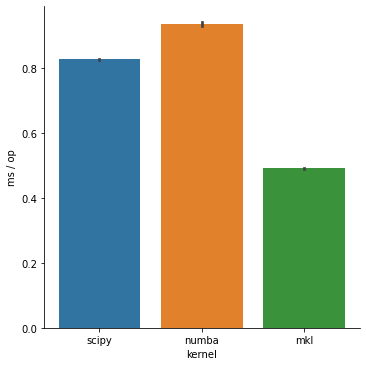

In [6]:
sns.catplot(data=mab, x='kernel', y='time', kind='bar')
plt.ylabel('ms / op')
plt.plot()

And multiplying by the transpose:

In [7]:
mab = get_runs('MultABt')
mab['time'] *= 1000
mab.groupby('kernel')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
kernel,,,,,,,,
mkl,9401.0,0.594445,0.158952,0.4998,0.5102,0.5179,0.6010,2.0405
numba,5833.0,0.876652,0.138124,0.7995,0.8212,0.8237,0.8421,2.1745
scipy,5158.0,1.079234,0.232240,0.9220,0.9479,0.9668,1.1074,2.6109


[]

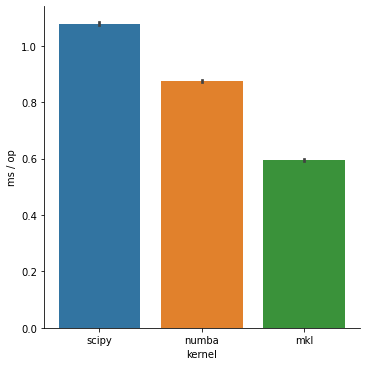

In [8]:
sns.catplot(data=mab, x='kernel', y='time', kind='bar')
plt.ylabel('ms / op')
plt.plot()

### Sweep by Density

We now measure sweeping a 100x100 square matrix multiply by increasing density.

In [9]:
dens = get_runs('MultAB-Density', 'density')
dens['time'] *= 1000

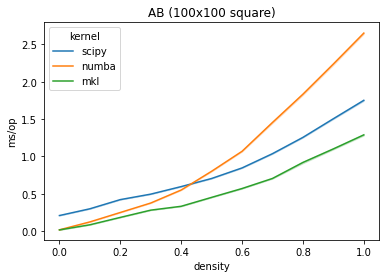

In [10]:
sns.lineplot(data=dens, x='density', y='time', hue='kernel')
plt.title('AB (100x100 square)')
plt.ylabel('ms/op')
plt.show()

And the transpose:

In [11]:
dens = get_runs('MultABt-Density', 'density')
dens['time'] *= 1000

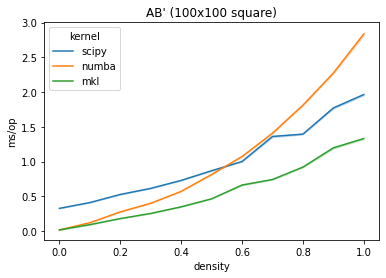

In [12]:
sns.lineplot(data=dens, x='density', y='time', hue='kernel')
plt.title('AB\' (100x100 square)')
plt.ylabel('ms/op')
plt.show()

### Sweep by Size

We now measure sweeping a 10% square matrix multiply by increasing size.

In [13]:
sizes = get_runs('MultAB-Size', 'size')
sizes['time'] *= 1000

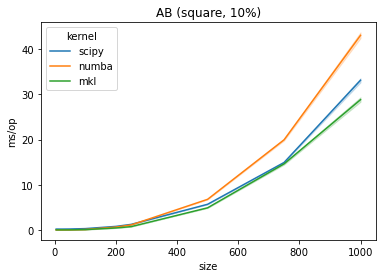

In [14]:
sns.lineplot(data=sizes, x='size', y='time', hue='kernel')
plt.title('AB (square, 10%)')
plt.ylabel('ms/op')
plt.show()

## Matrix-Vector Multiplication

Now we'll look at matrix/vector multiplication ($A\vec{x}$)

In [15]:
muax = get_runs('MultAx')
muax['time'] *= 1000
muax.groupby('kernel')['time'].describe()

,count,mean,std,min,25%,50%,75%,max
kernel,,,,,,,,
mkl,115208.0,0.009547,0.003036,0.0087,0.0090,0.0091,0.0092,0.1187
numba,102881.0,0.010009,0.003203,0.0091,0.0095,0.0095,0.0096,0.1120
scipy,34941.0,0.047627,0.010811,0.0438,0.0450,0.0454,0.0458,0.2535


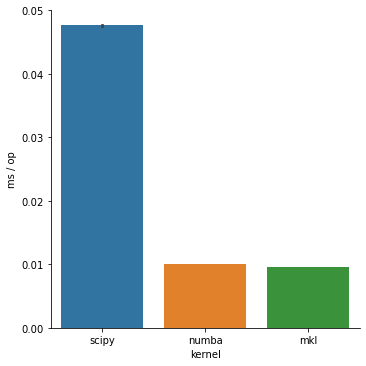

In [16]:
sns.catplot(data=muax, x='kernel', y='time', kind='bar')
plt.ylabel('ms / op')
plt.show()